#INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIAS E TECNOLOGIAS DE ALAGOAS
##ENGENHARIA CIVIL


### SAMYLE CLÁUDIA DOS SANTOS FARIAS



##  Atividade de mecânica dos Sólidos III _ AS-001


# Projeto Estrutural: Cálculo de Viga de Concreto Armado

Você está trabalhando no projeto estrutural de uma residência e precisa calcular a resistência de uma viga que fará parte do suporte da laje de concreto do segundo pavimento. A viga será submetida a uma carga distribuída, representando o peso da laje e a carga de uso prevista (móveis, pessoas e outros itens) e está **bi-apoiada**.

---

## 1. Dados da Viga

* **Viga:** Concreto armado, seção retangular.
* **Largura:** $b=20\text{ cm} = 0,20\text{ m}$
* **Altura:** $h=40\text{ cm} = 0,40\text{ m}$
* **Comprimento:** $L=5\text{ m}$
* **Carga Distribuída Total:** $q=5\text{ kN/m} = 5.000\text{ N/m}$
* **Resistência do Concreto (Compressão):** $f_{ck}=25\text{ MPa}$

---


##**2. ANÁLISE DO PROBLEMA**


---

Para esse exercício é preciso encontrar o centróide, o momento de Inércia com relação ao centróide e o momento fletor máximo.


---




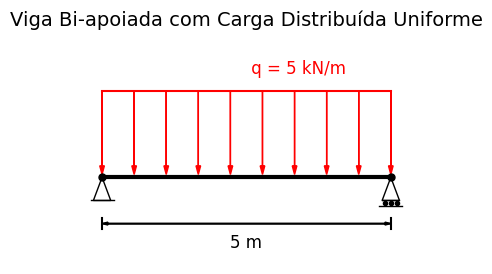

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Dados da Viga ---
L = 5  # Comprimento da viga (m)
q = 5  # Carga distribuída (kN/m)

# --- Configuração do Plot ---
fig, ax = plt.subplots(figsize=(8, 3))
ax.set_xlim(-0.5, L + 0.5)
ax.set_ylim(-1.5, 2.5)
ax.set_aspect('equal', adjustable='box')
ax.axis('off') # Remove os eixos

# 1. Desenho da Viga (Linha Principal)
ax.plot([0, L], [0, 0], 'k-', linewidth=3, label='Viga')

# 2. Desenho dos Apoios (Bi-apoiada: Pino e Rolo)
# Apoio da Esquerda (Pino)
ax.plot(0, 0, 'ko', markersize=5) # Círculo do pino
ax.plot([-0.2, 0.2], [-0.4, -0.4], 'k-', linewidth=1) # Base do apoio
# Triângulo do pino
pino = patches.Polygon([[0, 0], [-0.15, -0.4], [0.15, -0.4]], closed=True,
                       facecolor='white', edgecolor='k', linewidth=1)
ax.add_patch(pino)

# Apoio da Direita (Rolo)
ax.plot(L, 0, 'ko', markersize=5) # Círculo do rolo
ax.plot([L-0.15, L+0.15], [-0.4, -0.4], 'k-', linewidth=1) # Base do apoio
ax.plot([L-0.2, L+0.2], [-0.5, -0.5], 'k-', linewidth=1) # Chão (base)
# Triângulo do rolo
rolo = patches.Polygon([[L, 0], [L-0.15, -0.4], [L+0.15, -0.4]], closed=True,
                       facecolor='white', edgecolor='k', linewidth=1)
ax.add_patch(rolo)
# Círculos do rolo
ax.plot([L-0.1, L, L+0.1], [-0.45, -0.45, -0.45], 'ko', markersize=3)

# 3. Desenho da Carga Distribuída
num_setas = 10 # Número de setas para representar a carga
x_setas = [L * i / (num_setas - 1) for i in range(num_setas)]
for x in x_setas:
    ax.arrow(x, 1.5, 0, -1.3, head_width=0.08, head_length=0.15, fc='r', ec='r', linewidth=1)

# Linha da Carga Distribuída
ax.plot([0, L], [1.5, 1.5], 'r-', linewidth=1.5)

# 4. Anotações
ax.text(L/2, 1.8, f' q = {q} kN/m', fontsize=12, color='r')
ax.text(L/2, -1.2, f'{L} m', ha='center', fontsize=12)

# Linhas de cota para o comprimento L
ax.plot([0, 0], [-0.7, -0.9], 'k-')
ax.plot([L, L], [-0.7, -0.9], 'k-')
ax.arrow(0, -0.8, L, 0, head_width=0.05, head_length=0.1, fc='k', ec='k', length_includes_head=True)
ax.arrow(L, -0.8, -L, 0, head_width=0.05, head_length=0.1, fc='k', ec='k', length_includes_head=True)

plt.title('Viga Bi-apoiada com Carga Distribuída Uniforme', fontsize=14)
plt.show()

##**3. CÁLCULOS**

###**3.1 Calculo do centróide a seção transversal**



---


Coordenada do centroide com relação a base:

$$\bar{x} = \frac{b}{2} =\frac{20}{2} = 10 $$

$$\bar{y} = \frac{h}{2} =\frac{40}{2} = 20 $$

Seção transversal com o eixo passando no centróide:


---




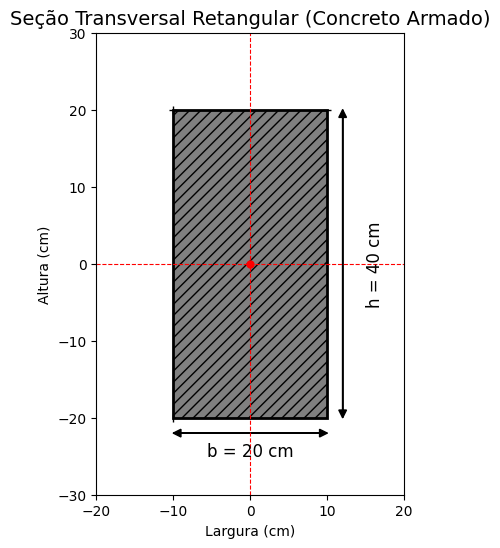

In [ ]:
# --- Dados da Seção ---
b = 20  # Largura (cm)
h = 40  # Altura (cm)

# --- Configuração do Plot ---
fig, ax = plt.subplots(figsize=(4, 6))
# Define os limites (centrado na origem)
ax.set_xlim(-b/2 - 10, b/2 + 10)
ax.set_ylim(-h/2 - 10, h/2 + 10)
ax.set_aspect('equal', adjustable='box')

# 1. Desenho do Retângulo da Seção (Concreto)
# O retângulo é desenhado a partir do canto inferior esquerdo
secao = patches.Rectangle((-b/2, -h/2), b, h,
                          facecolor='#808080', edgecolor='k', linewidth=2, hatch='///')
ax.add_patch(secao)

# 2. Desenho do Eixo (Centroide)
ax.axhline(0, color='r', linestyle='--', linewidth=0.8) # Eixo horizontal
ax.axvline(0, color='r', linestyle='--', linewidth=0.8) # Eixo vertical
ax.plot(0, 0, 'ro', markersize=5) # Centroide

# 3. Anotações de Largura (b)
ax.plot([-b/2, -b/2], [-h/2, h/2], 'k|') # Cotas verticais da largura
ax.text(0, -h/2 - 5, f'b = {b} cm', ha='center', fontsize=12)
ax.arrow(-b/2, -h/2 - 2, b, 0, head_width=1, head_length=1, fc='k', ec='k', length_includes_head=True)
ax.arrow(b/2, -h/2 - 2, -b, 0, head_width=1, head_length=1, fc='k', ec='k', length_includes_head=True)

# 4. Anotações de Altura (h)
ax.plot([-b/2, b/2], [h/2, h/2], 'k_') # Cotas horizontais da altura
ax.text(b/2 + 5, 0, f'h = {h} cm', va='center', fontsize=12, rotation=90)
ax.arrow(b/2 + 2, -h/2, 0, h, head_width=1, head_length=1, fc='k', ec='k', length_includes_head=True)
ax.arrow(b/2 + 2, h/2, 0, -h, head_width=1, head_length=1, fc='k', ec='k', length_includes_head=True)

plt.title('Seção Transversal Retangular (Concreto Armado)', fontsize=14)
plt.xlabel('Largura (cm)')
plt.ylabel('Altura (cm)')
plt.show()

### **3.2 Cálculo do momento de Inércia**


---


#### O momento de inércia para uma seção retangular em torno do seu eixo centroidal horizontal (que é o eixo onde ocorre a flexão) é dado pela fórmula:
$$I = \frac{b \cdot h^3}{12}$$

####*Para a flexão reta, é preciso do Momento de Inércia em relação ao eixo principal perpendicular ao plano de aplicação do momento fletor.*


---



In [ ]:
# --- Dados da Seção (convertidos para metros) ---
b = 0.20  # Largura (m)
h = 0.40  # Altura (m)

# --- Cálculo do Momento de Inércia (I = b*h^3 / 12) ---
I = (b * h**3) / 12

# --- Exibição do Resultado ---
print(f"--- MOMENTO DE INÉRCIA ---")
print(f"Largura (b): {b} m")
print(f"Altura (h): {h} m")
print("-" * 30)
# Usando notação científica para clareza
print(f"Momento de Inércia (I): {I:.8f} m^4")

--- MOMENTO DE INÉRCIA ---
Largura (b): 0.2 m
Altura (h): 0.4 m
------------------------------
Momento de Inércia (I): 0.00106667 m^4


### **3.3 Cálculo do momento**


---


#### A viga é bi-apoiada e está sujeita a uma carga distribuída uniforme (q). Para essa configuração clássica, o momento fletor máximo ocorre no centro do vão e é dado pela seguinte equação:

$$M_{máx} = \frac{q \cdot L^2}{8}$$


---



In [ ]:
# --- Dados da Viga ---
q = 5.0  # Carga distribuída (kN/m)
L = 5.0  # Comprimento da viga (m)

# --- Cálculo do Momento Fletor Máximo (M_max = q*L^2 / 8) ---
M_max = (q * L**2) / 8
M_max = M_max * 1000 #Em N/m
# --- Exibição do Resultado ---
print(f"--- MOMENTO FLETOR MÁXIMO ---")
print(f"Carga (q): {q} kN/m")
print(f"Comprimento (L): {L} m")
print("-" * 35)
print(f"Momento Máximo (M_max): {M_max:.3f} N*m")

--- MOMENTO FLETOR MÁXIMO ---
Carga (q): 5.0 kN/m
Comprimento (L): 5.0 m
-----------------------------------
Momento Máximo (M_max): 15625.000 N*m


 ### 3.4 Cálculo da Tensão Máxima de Flexão


---


#### A tensão máxima em uma viga sob flexão reta ocorre nas fibras mais distantes do eixo neutro (centroide) e é calculada pela Fórmula da Flexão:
$$\sigma_{máx} = \frac{M_{máx} \cdot y_{máx}}{I}$$


---



In [ ]:
# --- Distância máxima do Eixo Neutro (y_max = h/2) ---
y_max = h / 2

# --- Cálculo da Tensão Máxima (sigma_max = M_max * y_max / I) ---
sigma_max_Pa = (M_max * y_max) / I

# --- Conversão para MPa (1 MPa = 1,000,000 Pa) ---
sigma_max_MPa = sigma_max_Pa / 1000000

# --- Exibição dos Resultados ---
print(f"--- TENSÃO MÁXIMA DE FLEXÃO ---")
print(f"M_max (N*m): {M_max:.2f}")
print(f"I (m^4): {I:.8f}")
print(f"y_max (m): {y_max:.2f}")
print("-" * 35)
print(f"Tensão Máxima (sigma_max): {sigma_max_MPa:.2f} MPa")

--- TENSÃO MÁXIMA DE FLEXÃO ---
M_max (N*m): 15625.00
I (m^4): 0.00106667
y_max (m): 0.20
-----------------------------------
Tensão Máxima (sigma_max): 2.93 MPa


### 3.5 Cálculo da Flecha Máxima

---


#### A fórmula para a Flexa Máxima foi fornecida no enunciado, juntamente com a fórmula para calcular o Módulo de Elasticidade (E).


---


Módulo de Elasticidade (E):
$$E = 5600 \cdot \sqrt{f_{ck}}$$


---


 Flecha Máxima:
 $$\delta_{máx} = \frac{5 \cdot q \cdot L^4}{384 \cdot E \cdot I}$$

---



In [ ]:
import numpy as np

# --- 1. CÁLCULO DO MÓDULO DE ELASTICIDADE (E) ---
fck = 25.0              # Resistência à compressão (MPa)
E_MPa = 5600 * np.sqrt(fck)
E_Pa = E_MPa * 1e6      # Conversão para Pa (N/m^2)

# --- 2. DADOS DA VIGA ---
q = 5.0 * 1000            # Carga distribuída (N/m)

# --- 3. CÁLCULO DA FLECHA (delta_max = 5*q*L^4 / 384*E*I) ---
delta_max_m = (5 * q * L**4) / (384 * E_Pa * I)

# --- 4. EXIBIÇÃO DOS RESULTADOS ---
print(f"--- MÓDULO DE ELASTICIDADE ---")
print(f"E: {E_MPa:.0f} MPa")
print("-" * 35)

print(f"--- FLECHA MÁXIMA ---")
# Flecha em metros
print(f"Delta Máximo (m): {delta_max_m:.6f} m")

# Flecha em milímetros (mm)
delta_max_mm = delta_max_m * 1000
print(f"Delta Máximo (mm): {delta_max_mm:.3f} mm")

--- MÓDULO DE ELASTICIDADE ---
E: 28000 MPa
-----------------------------------
--- FLECHA MÁXIMA ---
Delta Máximo (m): 0.001362 m
Delta Máximo (mm): 1.362 mm


###**4. RESULTADOS**

| Cálculo | Símbolo | Valor   | Unidade  |
| :---: | :---: | :----: | :---: |
| Momento de Inércia | $I$ | $0,001067$ | $\text{m}^4$ |
| Momento Máximo | $M_{máx}$ | $15,625$ | $\text{kN}\cdot\text{m}$ |
| Tensão Máxima | $\sigma_{máx}$ | $2,93$ | $\text{MPa}$ |
| Flecha Máxima | $\delta_{máx}$ | $1,362$ | $\text{mm}$ |